In [6]:
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt

## 等间隔学习率衰减

lr_list:  [[0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.02

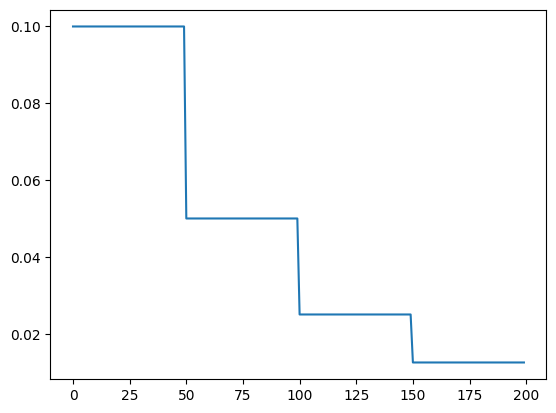

In [7]:
# 初始化参数
lr = 0.1
iteration = 10
max_epoch = 200

# 创建数据集
y_true = torch.tensor(data=[0])
x = torch.tensor(data=[1.0], dtype=torch.float32)
w = torch.tensor(data=[1.0], requires_grad=True, dtype=torch.float32)

# 创建优化器对象
optimizer = optim.SGD(params=[w], lr=lr, momentum=0.9)

# 创建等间隔学习率衰减对象
scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=50, gamma=0.5)  # gamma衰减系数

lr_list = []
epoch_list = []

# 循环遍历训练次数
for i in range(max_epoch):
    lr_list.append(scheduler.get_last_lr())
    epoch_list.append(i)
    for batch in range(iteration):
        y_pred = w*x
        loss = (y_pred-y_true)**2
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

print("lr_list: ", lr_list)

plt.plot(epoch_list, lr_list)
plt.show()

## 指定间隔学习率衰减

lr_list:  [[0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025]

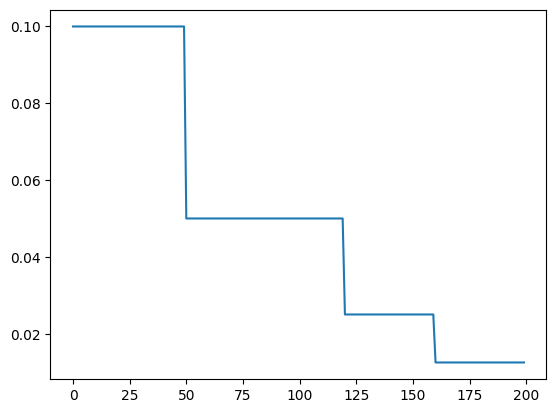

In [8]:
lr = 0.1
iteration = 10
max_epoch = 200

# 创建数据集
y_true = torch.tensor(data=[0])
x = torch.tensor(data=[1.0], dtype=torch.float32)
w = torch.tensor(data=[1.0], requires_grad=True, dtype=torch.float32)

# 创建优化器对象
optimizer = optim.SGD(params=[w], lr=lr, momentum=0.9)

# 创建等间隔学习率衰减对象
scheduler = optim.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[50, 120, 160], gamma=0.5, last_epoch=-1)  # gamma衰减系数

lr_list = []
epoch_list = []

# 循环遍历训练次数
for i in range(max_epoch):
    lr_list.append(scheduler.get_last_lr())
    epoch_list.append(i)
    for batch in range(iteration):
        y_pred = w*x
        loss = (y_pred-y_true)**2
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

print("lr_list: ", lr_list)

plt.plot(epoch_list, lr_list)
plt.show()

## 指数学习率衰减

lr_list:  [[0.1], [0.095], [0.09025], [0.0857375], [0.08145062499999998], [0.07737809374999999], [0.07350918906249998], [0.06983372960937498], [0.06634204312890622], [0.0630249409724609], [0.05987369392383786], [0.05688000922764597], [0.05403600876626367], [0.05133420832795048], [0.04876749791155295], [0.046329123015975304], [0.04401266686517654], [0.04181203352191771], [0.039721431845821824], [0.037735360253530734], [0.035848592240854196], [0.03405616262881148], [0.03235335449737091], [0.030735686772502362], [0.029198902433877242], [0.027738957312183378], [0.026352009446574207], [0.025034408974245494], [0.023782688525533217], [0.022593554099256556], [0.021463876394293726], [0.020390682574579037], [0.019371148445850084], [0.01840259102355758], [0.0174824614723797], [0.016608338398760712], [0.015777921478822676], [0.014989025404881541], [0.014239574134637464], [0.01352759542790559], [0.012851215656510309], [0.012208654873684792], [0.011598222130000552], [0.011018311023500524], [0.010467

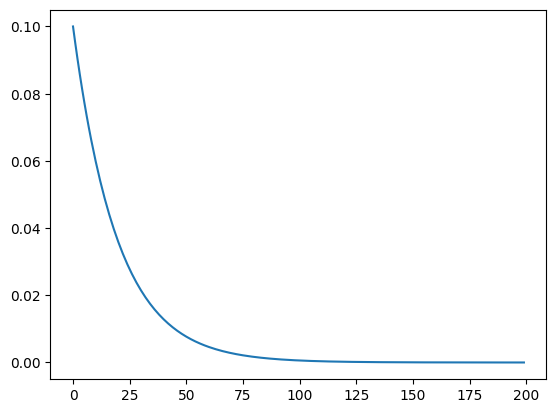

In [11]:
lr = 0.1
iteration = 10
max_epoch = 200

# 创建数据集
y_true = torch.tensor(data=[0])
x = torch.tensor(data=[1.0], dtype=torch.float32)
w = torch.tensor(data=[1.0], requires_grad=True, dtype=torch.float32)

# 创建优化器对象
optimizer = optim.SGD(params=[w], lr=lr, momentum=0.9)

# 创建等间隔学习率衰减对象
scheduler = optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.95)  # lr = lr*gamma^epoch

lr_list = []
epoch_list = []

# 循环遍历训练次数
for i in range(max_epoch):
    lr_list.append(scheduler.get_last_lr())
    epoch_list.append(i)
    for batch in range(iteration):
        y_pred = w*x
        loss = (y_pred-y_true)**2
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

print("lr_list: ", lr_list)

plt.plot(epoch_list, lr_list)
plt.show()